In [305]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm.notebook import trange, tqdm      # Progress bar in notebook.

# Plotting parameters for the notebook:
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 100

In [121]:
n = 100 # boxes
m = 10 # balls per box (on average)

In [122]:
data = m*np.ones(n)

In [405]:
def initialize(boxes, balls):
    return balls*np.ones(boxes)

def step(data_array):
    i = np.random.randint(len(data_array))
    j = np.random.randint(len(data_array))
#     data_array[i] -= 1
#     data_array[j] += 1
    if data_array[i] > 0:
        data_array[i] -= 1
        data_array[j] += 1

In [411]:
n_cut = int(n/2)

average_steps = 100
steps_in_total = 40000
step_interval = 50
steps_to_save = steps_in_total // step_interval


bincounts = np.zeros((average_steps, steps_to_save, n_cut))

for i in tqdm(range(average_steps)):
    data = initialize(n, m)
    for st in range(steps_to_save*step_interval):
        if st % step_interval == 0:
            bincounts[i, int(st / step_interval), :] = np.concatenate((np.bincount(data.astype('int32')), np.zeros(m*n)))[:n_cut]
        step(data)

In [412]:
bincounts_averaged = np.mean(bincounts, axis=0) / n
bincounts_averaged.shape

(800, 50)

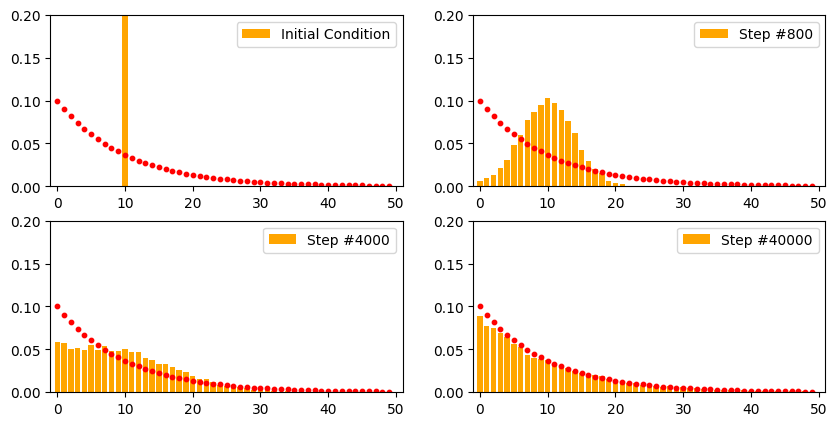

In [413]:
fig_steps, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,5))

s1 = 0
s2 = int(steps_to_save/step_interval)
s3 = int(5*steps_to_save/step_interval)
s4 = int(steps_to_save)

ax1.bar(x, bincounts_averaged[s1], color='orange', label='Initial Condition')
ax2.bar(x, bincounts_averaged[s2], color='orange', label="Step #"+str(s2*step_interval))
ax3.bar(x, bincounts_averaged[s3], color='orange', label="Step #"+str(s3*step_interval))
ax4.bar(x, bincounts_averaged[-1], color='orange', label="Step #"+str(s4*step_interval))
for ax in [ax1, ax2, ax3, ax4]:
    ax.scatter(x, np.exp(-x/m)/m, c='r', s=10, zorder=2)
    ax.set_xlim((-1,n_cut+1))
    ax.set_ylim((0,0.2))
    ax.legend()
plt.show()

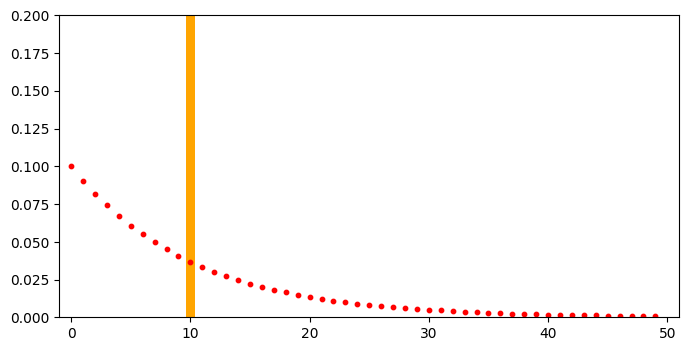

In [414]:
fig, ax = plt.subplots()

histbars = ax.bar(x, bincounts_averaged[0], color='orange')
ax.scatter(x, np.exp(-x/m)/m, c='r', s=10, zorder=2)
ax.set_xlim((-1,n_cut+1))
ax.set_ylim((0,0.2))


def animate(j):
    for i,b in enumerate(histbars):
        b.set_height(bincounts_averaged[j][i])
    return histbars


myAnimation = animation.FuncAnimation(fig, animate, frames=np.arange(0, steps_to_save), \
                                      interval=10, blit=True)

In [415]:
myAnimation.save('BaB_'+str(steps_in_total)+'_'+str(step_interval)+'.gif', fps=30)